In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from matplotlib.colors import colorConverter, ListedColormap 
from sklearn.preprocessing import OneHotEncoder

# 1. 线性单分类

# 1.1 生成样本数据集

In [3]:
def generate(sample_size, mean, cov, diff,regression):   
    num_classes = 2 #len(diff)
    samples_per_class = int(sample_size/2)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        
    if regression==False: #one-hot  0 into the vector "1 0
        class_ind = [Y==class_number for class_number in range(num_classes)]
        Y = np.asarray(np.hstack(class_ind), dtype=np.float32)
    X, Y = shuffle(X0, Y0)
    
    return X,Y    

In [4]:
input_dim = 2                    
np.random.seed(10) #定义随机数种子，以确保每一次调用代码生成的随机数相同
num_classes =2 #定义生成的类的个数

mean = np.random.randn(num_classes)
cov = np.eye(num_classes) # np.eye()生成对角矩阵， cov是构建的协方差矩阵
print("mean: ", mean) 
print("cov: ", cov)

mean:  [1.3315865  0.71527897]
cov:  [[1. 0.]
 [0. 1.]]


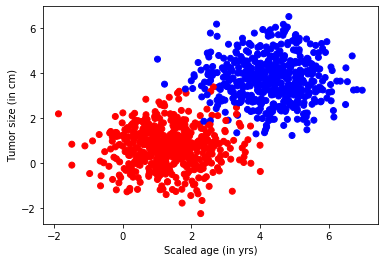

In [5]:
X, Y = generate(1000, mean, cov, [3.0], True) # 3.0表明两类之间的差是3， True表明使用非one-hot编码
colors = ['r' if l == 0 else 'b' for l in Y[:]]
plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()
lab_dim = 1

In [6]:
print(X.shape)
print(X[0:10])
print(Y.shape)
print(Y[0:10])

(1000, 2)
[[ 1.70933959  2.32968695]
 [ 0.95917076 -0.25204712]
 [ 1.00838527  1.37942458]
 [ 4.6847794   3.88360914]
 [ 4.91448132  4.32917205]
 [ 5.19310106  3.94223145]
 [ 2.30451755  2.93156315]
 [ 4.18661199  5.15675485]
 [ 4.57093944  2.50814167]
 [ 4.53641909  5.69852056]]
(1000,)
[0. 0. 0. 1. 1. 1. 1. 1. 1. 1.]


# 1.2 构建网络结构

In [7]:
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_labels = tf.placeholder(tf.float32, [None, lab_dim])
W = tf.Variable(tf.random_normal([input_dim, lab_dim]), name = 'weight')
b = tf.Variable(tf.zeros([lab_dim]), name = 'bias')

# 使用sigmoid作为激活函数
output = tf.nn.sigmoid(tf.matmul(input_features, W) + b)
cross_entropy = -(input_labels * tf.log(output) + (1 - input_labels) * tf.log(1 - output))
ser = tf.square(input_labels - output)
# 使用交叉熵计算loss
loss = tf.reduce_mean(cross_entropy)
# 使用平方差评估错误率
err = tf.reduce_mean(ser)
optimizer = tf.train.AdamOptimizer(0.04)
train = optimizer.minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.


Epoch: 0001 cost= 0.374858856 err= 0.1871055832132697
Epoch: 0002 cost= 0.208152279 err= 0.10196046722121536
Epoch: 0003 cost= 0.139379799 err= 0.051433274219743905
Epoch: 0004 cost= 0.109545536 err= 0.033747421542648225
Epoch: 0005 cost= 0.092600934 err= 0.026777505804784597
Epoch: 0006 cost= 0.081440486 err= 0.023057403136044742
Epoch: 0007 cost= 0.073477335 err= 0.020706237928243353
Epoch: 0008 cost= 0.067470752 err= 0.019081518438179047
Epoch: 0009 cost= 0.062741853 err= 0.017894015950150787
Epoch: 0010 cost= 0.058891907 err= 0.0169908479496371
Epoch: 0011 cost= 0.055674482 err= 0.016282921264064498
Epoch: 0012 cost= 0.052929696 err= 0.015714686291175894
Epoch: 0013 cost= 0.050549425 err= 0.015249690026394092
Epoch: 0014 cost= 0.048457947 err= 0.014863044013327453
Epoch: 0015 cost= 0.046599884 err= 0.014537162281339989
Epoch: 0016 cost= 0.044934172 err= 0.014259298781689722
Epoch: 0017 cost= 0.043429319 err= 0.01401999202062143
Epoch: 0018 cost= 0.042060688 err= 0.01381207650701981

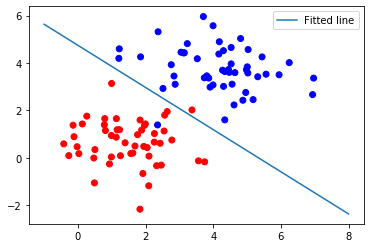

In [9]:
maxEpochs = 50 # 迭代50次
minibatchSize = 25 # 每个minibatchSize取25条

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    for epoch in range(maxEpochs):
        sumerr=0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize,:]
            y1 = np.reshape(Y[i*minibatchSize:(i+1)*minibatchSize],[-1,1])
            tf.reshape(y1,[-1,1])
            _,lossval, outputval,errval = sess.run([train,loss,output,err], feed_dict={input_features: x1, input_labels:y1})
            sumerr =sumerr+errval

        print ("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(lossval),"err=",sumerr/np.int32(len(Y)/minibatchSize))
        
    # 图形显示
    train_X, train_Y = generate(100, mean, cov, [3.0],True)
    colors = ['r' if l == 0 else 'b' for l in train_Y[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)

    x = np.linspace(-1,8,200) 
    y=-x*(sess.run(W)[0]/sess.run(W)[1])-sess.run(b)/sess.run(W)[1]
    plt.plot(x,y, label='Fitted line')
    plt.legend()
    plt.show() 

# 2. 线性多分类

# 2.1 生成样本集

In [10]:
def onehot(y,start,end):
    ohe = OneHotEncoder()
    a = np.linspace(start,end-1,end-start)
    b =np.reshape(a,[-1,1]).astype(np.int32)
    ohe.fit(b)
    c=ohe.transform(y).toarray()  
    return c     

In [11]:
def generate2(sample_size, num_classes, diff,regression=False):
    np.random.seed(10)
    mean = np.random.randn(2)
    cov = np.eye(2)  
    
    #len(diff)
    samples_per_class = int(sample_size/num_classes)

    X0 = np.random.multivariate_normal(mean, cov, samples_per_class)
    Y0 = np.zeros(samples_per_class)
    
    for ci, d in enumerate(diff):
        X1 = np.random.multivariate_normal(mean+d, cov, samples_per_class)
        Y1 = (ci+1)*np.ones(samples_per_class)
    
        X0 = np.concatenate((X0,X1))
        Y0 = np.concatenate((Y0,Y1))
        #print(X0, Y0)
    
  
    if regression==False: #one-hot  0 into the vector "1 0
        Y0 = np.reshape(Y0,[-1,1])        
        #print(Y0.astype(np.int32))
        Y0 = onehot(Y0.astype(np.int32),0,num_classes)
        #print(Y0)
    X, Y = shuffle(X0, Y0)
    #print(X, Y)
    return X,Y   

/home/hu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


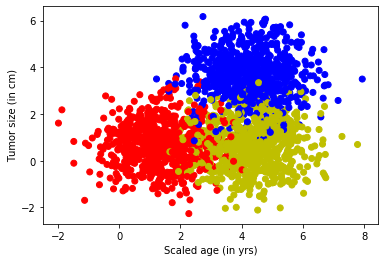

In [12]:
np.random.seed(10)

input_dim = 2
num_classes =3 
X, Y = generate2(2000,num_classes,[[3.0],[3.0,0]],False)
aa = [np.argmax(l) for l in Y]
colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]

plt.scatter(X[:,0], X[:,1], c=colors)
plt.xlabel("Scaled age (in yrs)")
plt.ylabel("Tumor size (in cm)")
plt.show()

In [13]:
print(X.shape)
print(X[0:10])
print(Y.shape)
print(Y[0:10])

(1998, 2)
[[ 1.83322304 -0.21208312]
 [ 0.76327133  1.72447501]
 [ 1.36199426 -1.06355419]
 [ 1.70933959  2.32968695]
 [ 5.16675493  3.63388403]
 [ 1.29520397 -0.13173728]
 [ 1.49549076  1.54479146]
 [ 2.58584425 -0.1749976 ]
 [ 1.67696226  1.12421517]
 [ 5.82639754  0.51275086]]
(1998, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


# 1.2 构建网络结构

In [14]:
lab_dim = num_classes
# tf Graph Input
input_features = tf.placeholder(tf.float32, [None, input_dim])
input_lables = tf.placeholder(tf.float32, [None, lab_dim])
# Set model weights
W = tf.Variable(tf.random_normal([input_dim,lab_dim]), name="weight")
b = tf.Variable(tf.zeros([lab_dim]), name="bias")
output = tf.matmul(input_features, W) + b

z = tf.nn.softmax( output )

a1 = tf.argmax(tf.nn.softmax( output ), axis=1)#按行找出最大索引，生成数组
b1 = tf.argmax(input_lables, axis=1)
err = tf.count_nonzero(a1-b1) #两个数组相减，不为0的就是错误个数

cross_entropy = tf.nn.softmax_cross_entropy_with_logits( labels=input_lables,logits=output)
loss = tf.reduce_mean(cross_entropy)#对交叉熵取均值很有必要



optimizer = tf.train.AdamOptimizer(0.04) #尽量用这个--收敛快，会动态调节梯度
train = optimizer.minimize(loss)  # let the optimizer train

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Epoch: 0001 cost= 0.451402217 err= 0.38430379746835414
Epoch: 0002 cost= 0.345496327 err= 0.12202531645569621
Epoch: 0003 cost= 0.315813571 err= 0.11037974683544312
Epoch: 0004 cost= 0.307761729 err= 0.10430379746835448
Epoch: 0005 cost= 0.308261842 err= 0.10329113924050638
Epoch: 0006 cost= 0.312538236 err= 0.10227848101265827
Epoch: 0007 cost= 0.318448305 err= 0.09873417721518993
Epoch: 0008 cost= 0.324948132 err= 0.09620253164556967
Epoch: 0009 cost= 0.331522495 err= 0.09417721518987347
Epoch: 0010 cost= 0.337921679 err= 0.09164556962025322
Epoch: 0011 cost= 0.344030470 err= 0.09215189873417727
Epoch: 0012 cost= 0.349801093 err= 0.09215189873417727
Epoch: 0013 cost= 0.355219454 err= 0.09113924050632917
Epoch: 0014 cost= 0.360288858 err= 0.09215189873417727
Epoch: 0015 cost= 0.365020663 err= 0.09164556962025322
Epoch: 0016 cost= 0.369430780 err= 0.09215189873417727
Epoch: 0017 cost= 0.373536825 err= 0.09113924050632917
Epoch: 0018 cost= 0.377357185 err= 0.09063291139240512
Epoch: 001

/home/hu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


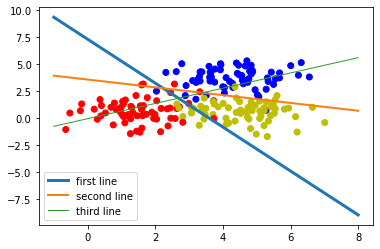

[[-2.3006732   0.68910384  0.7965734 ]
 [-1.1312296   1.9090445  -1.1280164 ]] [ 8.291076   -6.8598967  -0.03458125]


/home/hu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


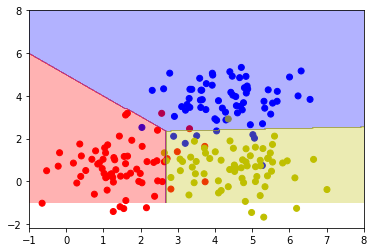

In [16]:
maxEpochs = 50
minibatchSize = 25

# 启动session
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for epoch in range(maxEpochs):
        sumerr=0
        for i in range(np.int32(len(Y)/minibatchSize)):
            x1 = X[i*minibatchSize:(i+1)*minibatchSize,:]
            y1 = Y[i*minibatchSize:(i+1)*minibatchSize,:]

            _,lossval, outputval,errval = sess.run([train,loss,output,err], 
                                                   feed_dict={input_features: x1, input_lables:y1})
            sumerr =sumerr+(errval/minibatchSize)

        print ("Epoch:", '%04d' % (epoch+1), "cost=","{:.9f}".format(lossval),"err=",
               sumerr/(np.int32(len(Y)/minibatchSize)))
 
    train_X, train_Y = generate2(200,num_classes, [[3.0],[3.0,0]],False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)
    
    x = np.linspace(-1,8,200) 

    y=-x*(sess.run(W)[0][0]/sess.run(W)[1][0])-sess.run(b)[0]/sess.run(W)[1][0]
    plt.plot(x,y, label='first line',lw=3)

    y=-x*(sess.run(W)[0][1]/sess.run(W)[1][1])-sess.run(b)[1]/sess.run(W)[1][1]
    plt.plot(x,y, label='second line',lw=2)

    y=-x*(sess.run(W)[0][2]/sess.run(W)[1][2])-sess.run(b)[2]/sess.run(W)[1][2]
    plt.plot(x,y, label='third line',lw=1)
    
    plt.legend()
    plt.show() 
    print(sess.run(W),sess.run(b))
    

    train_X, train_Y = generate2(200,num_classes,  [[3.0],[3.0,0]],False)
    aa = [np.argmax(l) for l in train_Y]        
    colors =['r' if l == 0 else 'b' if l==1 else 'y' for l in aa[:]]
    plt.scatter(train_X[:,0], train_X[:,1], c=colors)    
    
    nb_of_xs = 200
    xs1 = np.linspace(-1, 8, num=nb_of_xs)
    xs2 = np.linspace(-1, 8, num=nb_of_xs)
    xx, yy = np.meshgrid(xs1, xs2) # create the grid
    # Initialize and fill the classification plane
    classification_plane = np.zeros((nb_of_xs, nb_of_xs))
    for i in range(nb_of_xs):
        for j in range(nb_of_xs):
            #classification_plane[i,j] = nn_predict(xx[i,j], yy[i,j])
            classification_plane[i,j] = sess.run(a1, feed_dict={input_features: [[ xx[i,j], yy[i,j] ]]} )
    
    
    # Create a color map to show the classification colors of each grid point
    cmap = ListedColormap([
            colorConverter.to_rgba('r', alpha=0.30),
            colorConverter.to_rgba('b', alpha=0.30),
            colorConverter.to_rgba('y', alpha=0.30)])
    # Plot the classification plane with decision boundary and input samples
    plt.contourf(xx, yy, classification_plane, cmap=cmap)
    plt.show()    